Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.3447 - loss: 1.0573 - val_accuracy: 0.5625 - val_loss: 0.9951
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6939 - loss: 0.9500 - val_accuracy: 0.6250 - val_loss: 0.9478
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6572 - loss: 0.9414 - val_accuracy: 0.6875 - val_loss: 0.9076
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5999 - loss: 0.9078 - val_accuracy: 0.6875 - val_loss: 0.8664
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7889 - loss: 0.7867 - val_accuracy: 0.6875 - val_loss: 0.8229
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6789 - loss: 0.8759 - val_accuracy: 0.7500 - val_loss: 0.7825
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6803 - loss: 0.8150 - val_accuracy: 0.8125 - val_loss: 0.7410
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7239 - loss: 0.8071 - val_accuracy: 0.8125 - val_loss: 0.7001
Epoch 9/20
8/

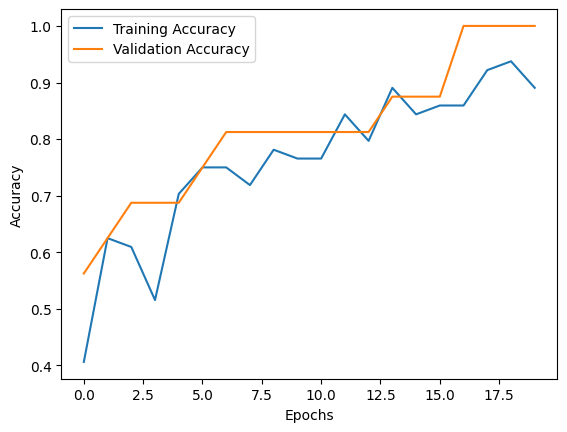

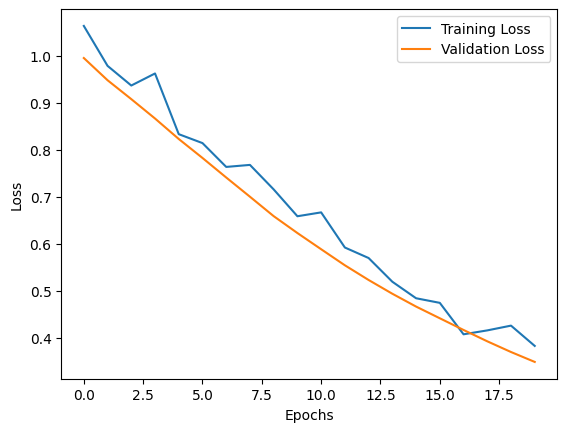

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Soil Texture (Class): 1 (0=sandy, 1=loamy, 2=clayey)
Model Size (Total Parameters): 2499


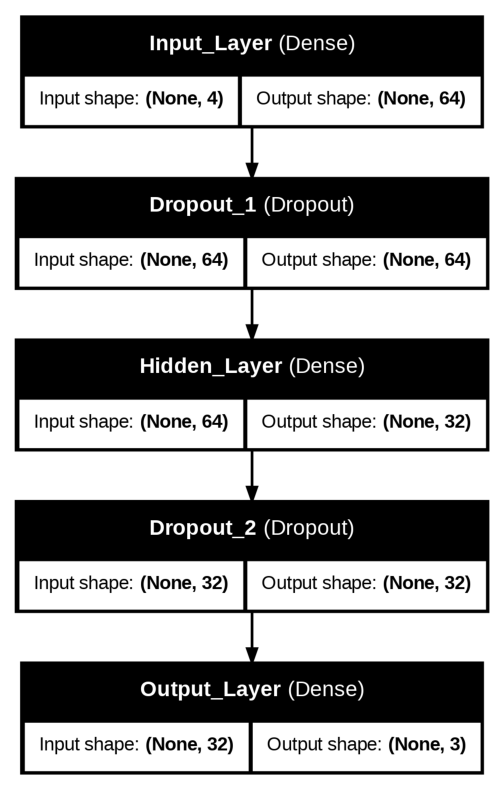

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Generate the dataset
num_samples = 100

# Generate features
soil_texture = np.random.choice([0, 1, 2], size=num_samples)  # 0 = sandy, 1 = loamy, 2 = clayey
pH = np.random.uniform(0, 14, size=num_samples)  # pH range 0-14
moisture_content = np.random.uniform(10, 40, size=num_samples)  # Moisture content range 10-40
organic_matter = np.random.uniform(1, 10, size=num_samples)  # Organic matter range 1-10

# Assign soil types (for human readability)
soil_type = np.where(soil_texture == 0, "sandy",
             np.where(soil_texture == 1, "loamy", "clayey"))

# Combine into a DataFrame
soil_dataset = pd.DataFrame({
    "soil_texture": soil_texture,
    "pH": pH,
    "moisture_content": moisture_content,
    "organic_matter": organic_matter,
    "soil_type": soil_type
})

# Step 2: Preprocessing
# Separate features and labels
X = soil_dataset.drop(columns=["soil_type"])  # Drop the human-readable label
y = soil_texture  # Use soil_texture (0, 1, 2) as labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to categorical (one-hot encoding)
y_categorical = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Step 3: Build the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), name='Input_Layer'),
    Dropout(0.3, name='Dropout_1'),
    Dense(32, activation='relu', name='Hidden_Layer'),
    Dropout(0.3, name='Dropout_2'),
    Dense(3, activation='softmax', name='Output_Layer')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=8, verbose=1)

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

# Step 6: Visualize training and validation performance
# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Make predictions
# Example new data point
new_data = np.array([[1, 6.5, 25.0, 4.5]])  # Example input
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
predicted_class = np.argmax(prediction)
print(f"Predicted Soil Texture (Class): {predicted_class} (0=sandy, 1=loamy, 2=clayey)")

# Step 8: Save and load the model
# Save the model in the native Keras format
model.save('soil_classification_model.keras')

# Load the model in the native Keras format
loaded_model = tf.keras.models.load_model('soil_classification_model.keras')

# Step 9: Model size
model_size = model.count_params()
print(f"Model Size (Total Parameters): {model_size}")

# Step 10: Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the architecture image
img = Image.open('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
print(soil_dataset)

    soil_texture         pH  moisture_content  organic_matter soil_type
0              0   1.138813         34.611783        9.273071     sandy
1              1  11.631406         23.883227        9.538612     loamy
2              1   9.673398         25.775341        2.545412     loamy
3              2   1.517180         12.126116        8.665804    clayey
4              2  13.020914         29.440879        7.852696    clayey
..           ...        ...               ...             ...       ...
95             2  10.687929         11.665602        7.119985    clayey
96             0   2.795960         26.583756        7.802845     sandy
97             0   5.047401         12.556766        8.577897     sandy
98             0  13.236841         26.252990        5.626985     sandy
99             1   7.390887         31.822626        8.647917     loamy

[100 rows x 5 columns]
